In [17]:
import pandas as pd
import numpy as np

In [18]:
url = 'https://github.com/kb22/Heart-Disease-Prediction/blob/master/dataset.csv?raw=true'
df = pd.read_csv(url)

In [19]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Map to choose which model to use: 
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [20]:
import sklearn
from sklearn.svm import LinearSVC

In [21]:
np.random.seed(42)

In [22]:
X = df.drop('target', axis=1)
y = df.target

In [23]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 )

In [24]:
LSVC_clf = LinearSVC()

LSVC_clf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [25]:
LSVC_clf.score(X_test, y_test)

0.8688524590163934

# now make predictions

In [26]:
from sklearn.metrics import accuracy_score
preds = LSVC_clf.predict(X_test)
preds


array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0])

In [27]:
# predictions are in the same format as our test labels
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]])

In [28]:
accuracy_score(y_test, preds)

0.8688524590163934

# now use random forest  classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier()

rnd_clf.fit(X_train, y_train)

rnd_clf.score(X_test, y_test)

0.8524590163934426

# what does fit actually do in this context?

when we pass x_train and y_train to fit, it will cause the model to go through all of the examples in x_train, and see what the corresponding y label is, and try to figure out the patterns that leads to a 1 or a 0 as a label

- diagnose the problem 
- then figure out what model will help solve the problem

# now make predictions

In [30]:
y_preds = rnd_clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [31]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]])

In [32]:
accuracy_score(y_test, preds)

0.8688524590163934

# Now use Predict_Proba()

returns probabilities for a classification label 


In [33]:
rnd_clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [34]:
# return the probability of that label being true, or the probability of a classification label
# for example, the probability of the first target being 0, is 87% yes, .13% no
# 2nd record isn't confident, it's pretty much a coin toss 50-50
# we could use predict_proba() to only give us the samples where the probability is GT .90
rnd_clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.44, 0.56],
       [0.84, 0.16],
       [0.18, 0.82]])

In [35]:
# on video 97 maiking predictions with regression model Machine learning 

# Evaluating the model 
3 ways to evaluate sci-kit learn models
1. estimator `score` method
2. the `scoring` parameter
3. Problem-specific metric functions

In [36]:
rnd_clf.score(X_train, y_train)

1.0

In [37]:
rnd_clf.score(X_test, y_test)
#press shift + tab to get explanation of any method

0.8524590163934426

Evaluating the model using the `scoring` parameter aka cross-validation

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
cross_val_score(rnd_clf, X,y)
#returns an array of 5 diff scores becuase the model is trained on 5 different versions of training data, 
#and evaluated on 5 different versions of test data compared to the normal train and test split once on the data
# the last 20% of the data is usually used for the test split. however, with cross-validation the testplit is partioned on different parts (5 parts) of the data set 

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [40]:
# now take the average of 5 scores
print("cross val score:", np.mean(cross_val_score(rnd_clf, X,y)))

# copared to the single score
print("single score:", accuracy_score(y_test, preds))

cross val score: 0.8183606557377049
single score: 0.8688524590163934


In [41]:
# if scoring parameter set to None (default), it uses the defualt scoring parameter of the model.
# in this case: mean accuracy (classification)

#Other classification model scoring parameters (Machine learning video 100) 

## Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion maxtrix
4. Classification report


# Accuracy
 given a random sample, our model is 82.15% likely to identify the correct label (used cross val)

 # Area under receiver operating charateristic curve (AUC/ROC)
 
 https://www.youtube.com/watch?v=0h1zicNh0zE
 
 - ROC curves are a comparison between a model's True postive rate (tpr) vs False positive rate (FPR)

 
- True positive = model predicts a 1 when truth is 1 
-  False positive = model predicts 1 when truth is 0
-  True negative = model predicts 0 when truth is 0 
-  False negative = model predicts 0 when truth is 1 

In [42]:
from sklearn.metrics import roc_curve

In [43]:
y_probs = rnd_clf.predict_proba(X_test)
y_probs[:5]
# first column predicts priobabibilty being 0, and second predicts probability being 1 

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.44, 0.56],
       [0.84, 0.16],
       [0.18, 0.82]])

In [44]:
y_probs_positive = y_probs[:, 1]
y_probs_positive

array([0.11, 0.51, 0.56, 0.16, 0.82, 0.86, 0.63, 0.05, 0.01, 0.54, 0.74,
       0.31, 0.89, 0.05, 0.97, 0.98, 0.99, 0.16, 0.05, 0.02, 0.5 , 0.11,
       0.61, 0.72, 0.75, 0.65, 0.8 , 0.78, 0.17, 0.85, 0.06, 0.08, 0.04,
       0.37, 0.54, 0.11, 0.55, 0.84, 0.67, 0.92, 0.87, 0.83, 0.81, 0.62,
       0.68, 0.24, 0.6 , 1.  , 0.17, 0.03, 0.15, 0.2 , 0.75, 0.75, 0.13,
       0.07, 0.3 , 0.99, 0.13, 0.  , 0.13])

In [45]:
#calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# check the false positive rate
fpr
#we get an array but it doesn't make much since to look at this array. Therefore we will plot it 

array([0.        , 0.        , 0.        , 0.        , 0.03448276,
       0.03448276, 0.03448276, 0.03448276, 0.06896552, 0.06896552,
       0.13793103, 0.13793103, 0.13793103, 0.17241379, 0.17241379,
       0.27586207, 0.4137931 , 0.44827586, 0.65517241, 0.72413793,
       0.72413793, 0.82758621, 1.        ])

In [46]:
# create a function for plotting ROC curves
import matplotlib.pyplot as plt 

def plot_roc_curve(fpr, tpr):
    
    #plot ROC curve
    plt.plot(fpr, tpr, color="orange", label = "ROC")
    
    #plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='guessing')
    
    plt.xlabel('False positive rate (FPR)')
    plt.ylabel('True positive rate (TPR)')
    plt.title('Receiver Operating Charateristic Curve (ROC)')
    plt.legend()
    plt.show()

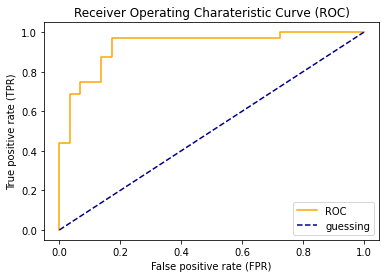

In [47]:
plot_roc_curve(fpr, tpr)

In [48]:
from sklearn.metrics import roc_auc_score

#are under the auc curve
roc_auc_score(y_test, y_probs_positive)


0.9310344827586207

# Confusion Matrix
video: https://www.youtube.com/watch?v=ydzrKHf6YV8

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. 

In essence, giving you an idea of where the model is being confused

In [49]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_preds)
conf_mat
#it's easier to visualize

array([[24,  5],
       [ 4, 28]])

In [50]:
# visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test, y_preds, rownames=['Actual Labels'], colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


In [51]:
len(X_test)

61

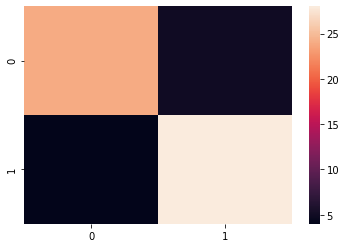

In [52]:
import seaborn as sns

sns.heatmap(conf_mat)

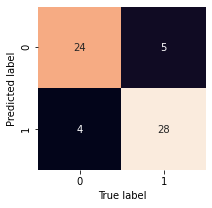

In [53]:
fig, ax = plt.subplots(figsize=(3,3))
ax = sns.heatmap(conf_mat,
                annot=True, #annote boxes with confat info
                cbar=False)

plt.xlabel('True label')
plt.ylabel('Predicted label')

plt.show()

## Classification Report

In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## 4.2.2 Regrssion Model Evaluation Metrics

1. R^2 or coefficient of determination
2. mean absolute error (MAE)
3. Mean square error (MSE)

In [55]:
# import boston data set 
from sklearn.datasets import load_boston

In [56]:
boston_df = load_boston()

In [57]:
boston_df.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [58]:
data = pd.DataFrame(boston_df.data)
data.columns = boston_df.feature_names
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [59]:
boston_df.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [60]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.data
y = boston_df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

RandomForestRegressor()

In [61]:
y_preds = model.predict(X_test)

## R^2 
compares your models predictions to the mean of the targets 

In [62]:
model.score(X_train, y_train) # R^2 is the default

0.9763520974033731

In [63]:
from sklearn.metrics import r2_score

r2_score(y_test, y_preds)

0.8654448653350507

In [64]:
y_test.mean()

21.488235294117644

# Mean Absolute error 

tells us how far off each prediction is (Machine learning video 107)

MAE is the average of the absolute differences between the predictions and actual values. 

what this is saying is that for every prediction our model makes, it will be +- 2.13 away from the actual value

In [65]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [66]:
df = pd.DataFrame( data={"actual values": y_test,
                        "predicted values": y_preds})

df['differences'] = df["predicted values"] - df["actual values"]

df

,actual values,predicted values,differences
0,23.6,23.081,-0.519
1,32.4,30.574,-1.826
2,13.6,16.759,3.159
3,22.8,23.460,0.660
4,16.1,16.893,0.793
...,...,...,...
97,17.9,13.159,-4.741
98,9.6,12.476,2.876
99,17.2,13.612,-3.588
100,22.5,20.205,-2.295


## Mean squared error 

In [67]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

# mse will always be higher that mae bc it squares the errors rather than taking the absolute difference

9.867437068627442

tip for regression;  we want to minimize MSE, MAE, all while maximizing R^2

In [68]:
# now let;s cross-val on our regression model 

In [69]:
np.random.seed(42)

cv_r2 = cross_val_score(model, X, y, cv=6, scoring=None)
cv_r2.mean()

0.6590368867466706

In [70]:
np.random.seed(42)

cv_r2 = cross_val_score(model, X, y, cv=6, scoring='r2')
cv_r2

array([0.75663087, 0.81693104, 0.75607254, 0.79879079, 0.37812734,
       0.44766874])

In [71]:
# lower than our original r2. Looks like when we initally got a lucky split when split the test and training data nd trained our model on the training data. this is why its important to test-train-split the data set several tines. 
cv_r2.mean()

0.6590368867466706

In [72]:
# mean absolute error
cv_mae = cross_val_score(model, X, y, cv=6, scoring='neg_mean_absolute_error')
cv_mae

array([-2.05668235, -2.36652941, -3.25085714, -2.55819048, -5.02617857,
       -2.94220238])

In [73]:
cv_mse = cross_val_score(model, X, y, cv=6, scoring='neg_mean_squared_error')
cv_mse

array([ -7.28012982, -11.49093866, -18.44771315, -17.08377381,
       -65.82612302, -13.64212805])

In [74]:
# original mean square error was 9.87
cv_mse.mean()

-22.29513441967788

## 4.3 Using different evaluation metrics as Scikit-Learn functions
 # classfication evaluation functions 

In [78]:
url = 'https://github.com/kb22/Heart-Disease-Prediction/blob/master/dataset.csv?raw=true'
df = pd.read_csv(url)

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

np.random.seed(42)

X = df.drop('target', axis=1)
y = df.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 )

rnd_clf = RandomForestClassifier()

rnd_clf.fit(X_train, y_train)

y_preds = rnd_clf.predict(X_test)
    
#evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_preds))
print("Precision:", precision_score(y_test, y_preds))
print("Recall:", recall_score(y_test, y_preds))
print("f1:", f1_score(y_test, y_preds))


Accuracy: 0.8524590163934426
Precision: 0.8484848484848485
Recall: 0.875
f1: 0.8615384615384615


In [80]:
def clf_evaluation(y_test, y_preds):
    print("Accuracy:", accuracy_score(y_test, y_preds).round(2))
    print("Precision:", precision_score(y_test, y_preds).round(2))
    print("Recall:", recall_score(y_test, y_preds).round(2))
    print("f1:", f1_score(y_test, y_preds).round(2))

In [81]:
baseline_metrics = clf_evaluation(y_test, y_preds)
baseline_metrics

Accuracy: 0.85
Precision: 0.85
Recall: 0.88
f1: 0.86


# Improving our model

video 111

first predictions = baseline predictions
first model = baseline model

how can we improve the model? 
* collect more data (generally more data, the better)
* we could improve our data (standardize/normazlize and/or choose better features)
- we could use a more complex model (decision tree vs random forest model)
- tune hyperparamaters




In [155]:
# see all of a model's hyperparameters
rnd_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# 5.2 hyperparameter tuning with RandomizedSearchCV

In [82]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators': [100, 200, 500, 1000, 1200], 
       'max_depth': [None, 5, 10, 20, 30],
       'max_features': ['auto', 'sqrt'], 
       'min_samples_split': [2, 4, 6],
       'min_samples_leaf': [1, 2, 4]}

rs_clf = RandomizedSearchCV(estimator=rnd_clf,
                           param_distributions=grid,
                           n_iter=10, # number of models to try
                           cv=5, # 5-fold cross validation
                           verbose=2)

In [83]:
# now fit
# note we only need to fit and not test train split because cv automatically splits our validation sets for us 
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=None 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   0.7s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   0.7s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=None 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   0.8s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=None 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   0.8s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=None 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   0.7s
[CV] n_estimators=500, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=500, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   1.8s
[CV] n_estimators=500, min_samples_spl

[CV]  n_estimators=500, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.3s
[CV] n_estimators=500, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=500, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.4s
[CV] n_estimators=500, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=500, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.3s
[CV] n_estimators=500, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=500, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.3s
[CV] n_estimators=500, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=500, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.3s
[CV] n_estimators=200, min_samples_split=4, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   54.1s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [100, 200, 500, 1000,
                                                         1200]},
                   verbose=2)

In [84]:
# the best cross-validated results across 10 different models
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10}

In [85]:
# now when we call predict on rs_clf it will use the best params above by defualt
rs_y_preds = rs_clf.predict(X_test)

# evaluate the predictons 
rs_metrics = clf_evaluation(y_test, rs_y_preds)
rs_metrics
# did not find an improvement compared to default hyper parameters  

Accuracy: 0.85
Precision: 0.85
Recall: 0.88
f1: 0.86


# 5.3 Hyperparameter tuning with GridSearchCV

In [86]:
# diff between RandomizedSearchCV and GridSearchCV is that GridSearchCV will go through every single combination of hyperparameters
grid

{'n_estimators': [100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [87]:
6*5*2*3*3

540

In [88]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10}

In [89]:
# 540 is a lot of combinations which requires a lot of computing power. so instead we can reduce the grid search space
# but we can use the best parameters from our RandomizedSearchCV to influence the paramters we reduce to in GridSearchCV
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4],
          'min_samples_leaf': [1, 2]}

In [90]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)


grid_clf = GridSearchCV(estimator=rnd_clf,
                           param_grid=grid_2,
                           cv=5, # 5-fold cross validation
                           verbose=2)

In [91]:
grid_clf.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   1.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   1.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   34.0s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [4],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [92]:
grid_clf.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 100}

In [93]:
# now predict and evaulate the predictions 
gs_y_preds = grid_clf.predict(X_test)

gs_metrics = clf_evaluation(y_test, gs_y_preds)
gs_metrics

Accuracy: 0.87
Precision: 0.85
Recall: 0.91
f1: 0.88


let's compare our models metrics  video 114

In [94]:
mydict = {[baseline_metrics] : 'baseline',
          [rs_metrics]: 'random search',
          [gs_metrics]: 'grid search'}

compare_metrics = pd.DataFrame(mydict, index=[0])

compare_metrics #.plot.bar(figsize=(10,8))

TypeError: unhashable type: 'list'

In [ ]:
baseline_metrics

In [ ]:
print(rs_metrics)

In [ ]:
gs_metrics

# Save and load a trained model

two ways to save and load machine learning models: 
1. with python's `pickle` module
2. with pythons `joblib` module

In [ ]:
# use pickle
import pickle

# save an existing model to file
#pickle.dump(grid_clf, open('gs_random_forest_model_1.pkl', "wb"))

In [ ]:
# load saved model
# we dont have to go through all the fine tuning above and also retrain our model. we can just load the model and make predictions
#import pickle
#loaded_pickle_model = pickle.load(open('gs_random_forest_model_1.pkl', 'rb')) # pass 'rb' (read binary) when reading in a model

In [95]:
pickle_y_preds = loaded_pickle_model.predict(X_test)
pickle_y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [96]:
clf_evaluation(y_test, pickle_y_preds)

Accuracy: 0.87
Precision: 0.85
Recall: 0.91
f1: 0.88


# Save model using joblib

In [97]:
from joblib import dump, load

# save model to file 
dump(grid_clf, filename='gs_random_forest_model_1.joblib')

['gs_random_forest_model_1.joblib']

In [98]:
# import saved joblib model
loaded_job_model = load(filename='gs_random_forest_model_1.joblib')

In [101]:
joblib_y_preds = loaded_job_model.predict(X_test)
joblib_y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [102]:
clf_evaluation(y_test, joblib_y_preds)

Accuracy: 0.87
Precision: 0.85
Recall: 0.91
f1: 0.88


In [ ]:
# joblib is better for scikit learn models and fitted models 